In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Collection

In [87]:
df=pd.read_csv("Online_Retail.csv")

In [88]:
df.head(
    
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [89]:
# Check shape of data
df.shape


(541909, 8)

2. Data Exploration and Visualization:

In [90]:
# Check feature details of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [91]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [92]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

3. Data Cleaning

In [93]:
#Check For duplicates

duplicates = df[df.duplicated()]
duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446.0,United Kingdom


In [94]:
# Check missing values in data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [95]:
# Calculating the Missing Values % contribution in DF
df_null = round(df.isnull().sum()/len(df)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

As we can see two columns in data have missing values.
* Description - 0.27% (1454 nos.)
* CustomerID - 24.93% (135080)

In [96]:
df.drop('Description', axis=1, inplace=True)
df = df.dropna()
df.shape

(406829, 7)

<Axes: >

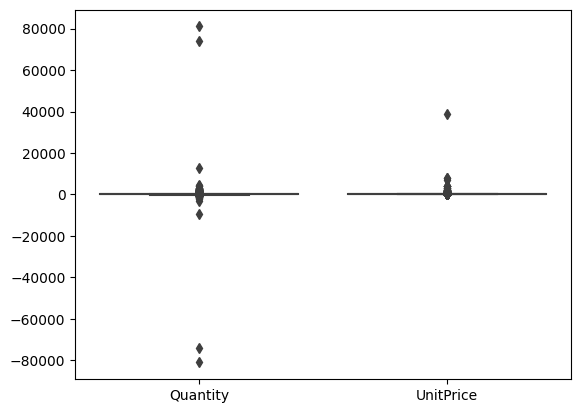

In [97]:
sns.boxplot(data=df[['Quantity', 'UnitPrice']])

In [98]:
# Function to remove outliers based on iqr method
def remove_outliers_iqr(df, columns, threshold=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
columns_with_outliers = ['Quantity', 'UnitPrice']

In [99]:
df = remove_outliers_iqr(df, columns_with_outliers)

<Axes: >

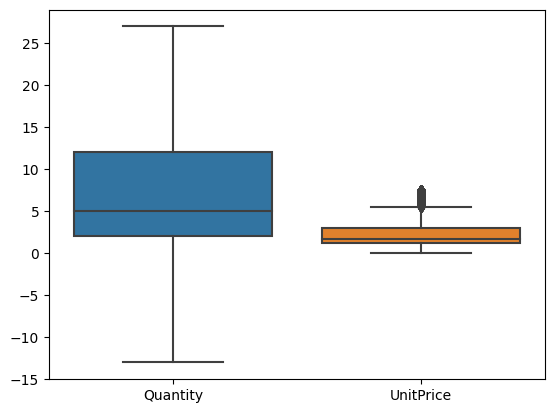

In [100]:
sns.boxplot(data=df[['Quantity', 'UnitPrice']])

In [101]:
# Customer ID as numerical data does not make sense
df['CustomerID'] = df['CustomerID'].astype(str)


In [102]:
df.describe(include=['O'])


,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country
count,344393,344393,344393,344393,344393
unique,19480,3415,18142,4222,37
top,576339,85123A,14-11-2011 15:27,17841.0,United Kingdom
freq,460,1724,460,7492,310426


In [103]:
df.describe()

,Quantity,UnitPrice
count,344393.000000,344393.000000
mean,7.279797,2.201251
std,6.880816,1.548459
min,-13.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.650000
75%,12.000000,2.950000
max,27.000000,7.500000


In [104]:
# Qunatity in negative does not make sense
df = df[df['Quantity'] >= 0]

In [105]:
df.shape

(338182, 7)

4. Transform Data:

In [106]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [107]:
# Convert to InvoiceDate to Year-Month format
from datetime import timedelta
df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df['month_year'].nunique()


13

In [108]:
# Create a Month cohort

month_cohort = df.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12     833
2011-01     701
2011-02     703
2011-03     919
2011-04     805
2011-05    1001
2011-06     939
2011-07     902
2011-08     879
2011-09    1195
2011-10    1319
2011-11    1601
2011-12     587
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

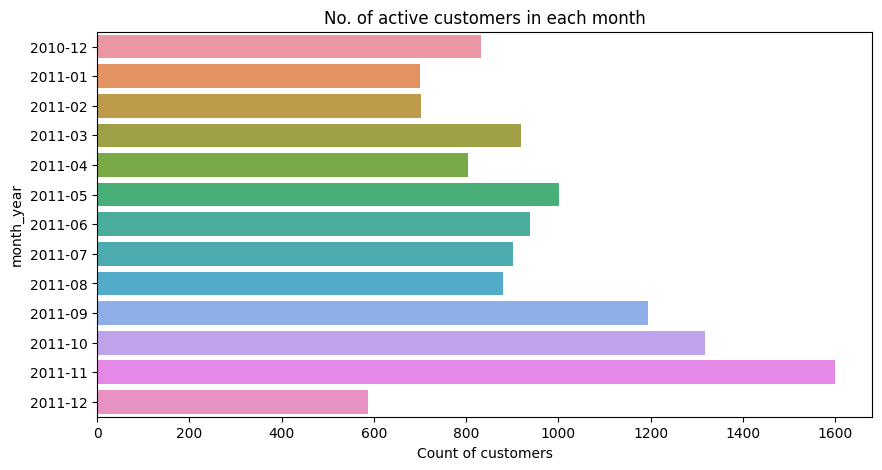

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

In [110]:
# Analyze the retention rate od customers
month_cohort - month_cohort.shift(1)

month_year
2010-12       NaN
2011-01    -132.0
2011-02       2.0
2011-03     216.0
2011-04    -114.0
2011-05     196.0
2011-06     -62.0
2011-07     -37.0
2011-08     -23.0
2011-09     316.0
2011-10     124.0
2011-11     282.0
2011-12   -1014.0
Freq: M, Name: CustomerID, dtype: float64

In [111]:
# Monthly cohort percent change
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -15.85
2011-02     0.29
2011-03    30.73
2011-04   -12.40
2011-05    24.35
2011-06    -6.19
2011-07    -3.94
2011-08    -2.55
2011-09    35.95
2011-10    10.38
2011-11    21.38
2011-12   -63.34
Freq: M, Name: CustomerID, dtype: float64

Text(0.5, 1.0, 'Month-wise customer retention rate')

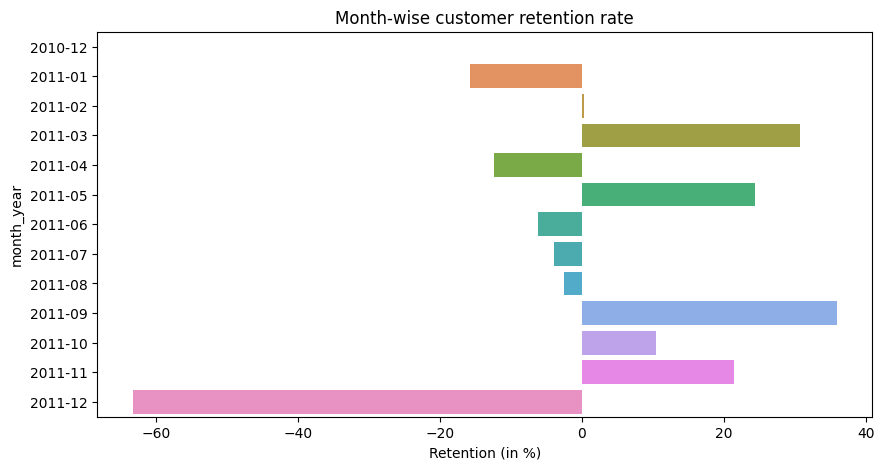

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate")

In [113]:
# Monetary analysis:
df['amount'] = df['Quantity']*df['UnitPrice']


In [115]:
df_monetary = df.groupby('CustomerID')['amount'].sum().reset_index()
df_monetary

,CustomerID,amount
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94
...,...,...
4187,18280.0,137.00
4188,18281.0,46.92
4189,18282.0,113.13
4190,18283.0,2051.98


In [116]:
# Frequency Analysis:
df_frequency = df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
df_frequency


,CustomerID,InvoiceNo
0,12347.0,7
1,12348.0,3
2,12349.0,1
3,12350.0,1
4,12352.0,7
...,...,...
4187,18280.0,1
4188,18281.0,1
4189,18282.0,2
4190,18283.0,16


In [117]:
# Recency Analysis:
ref_day = max(df['InvoiceDate']) + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374


In [118]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12347.0,2
1,12348.0,249
2,12349.0,19
3,12350.0,310
4,12352.0,36
...,...,...
4187,18280.0,278
4188,18281.0,181
4189,18282.0,8
4190,18283.0,4
